In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Reading the file
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [47]:
# Naming the dataframe
df.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabeteesPedigreeFun','Age','Class']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [48]:
df.shape

(767, 9)

In [49]:
# checking for null values
df.isnull().sum()

Pregnancies             0
Glucose                 0
BloodPressure           0
SkinThickness           0
Insulin                 0
BMI                     0
DiabeteesPedigreeFun    0
Age                     0
Class                   0
dtype: int64

In [50]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

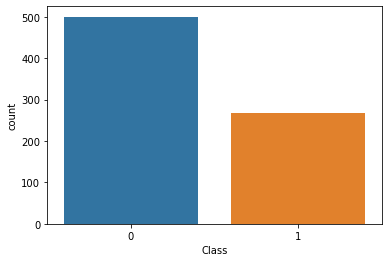

In [65]:
# plotting the couts for the Class(dependent feature)
sns.countplot(df.Class)

In [66]:
df.Class.value_counts()

0    500
1    267
Name: Class, dtype: int64

In [ ]:
## although the 0's and 1's are not equal they are not imbalanced

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

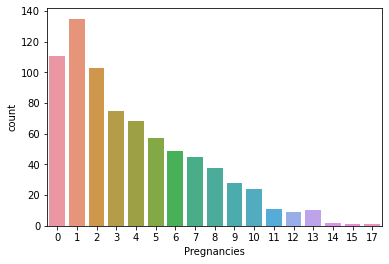

In [51]:
sns.countplot(df.Pregnancies)

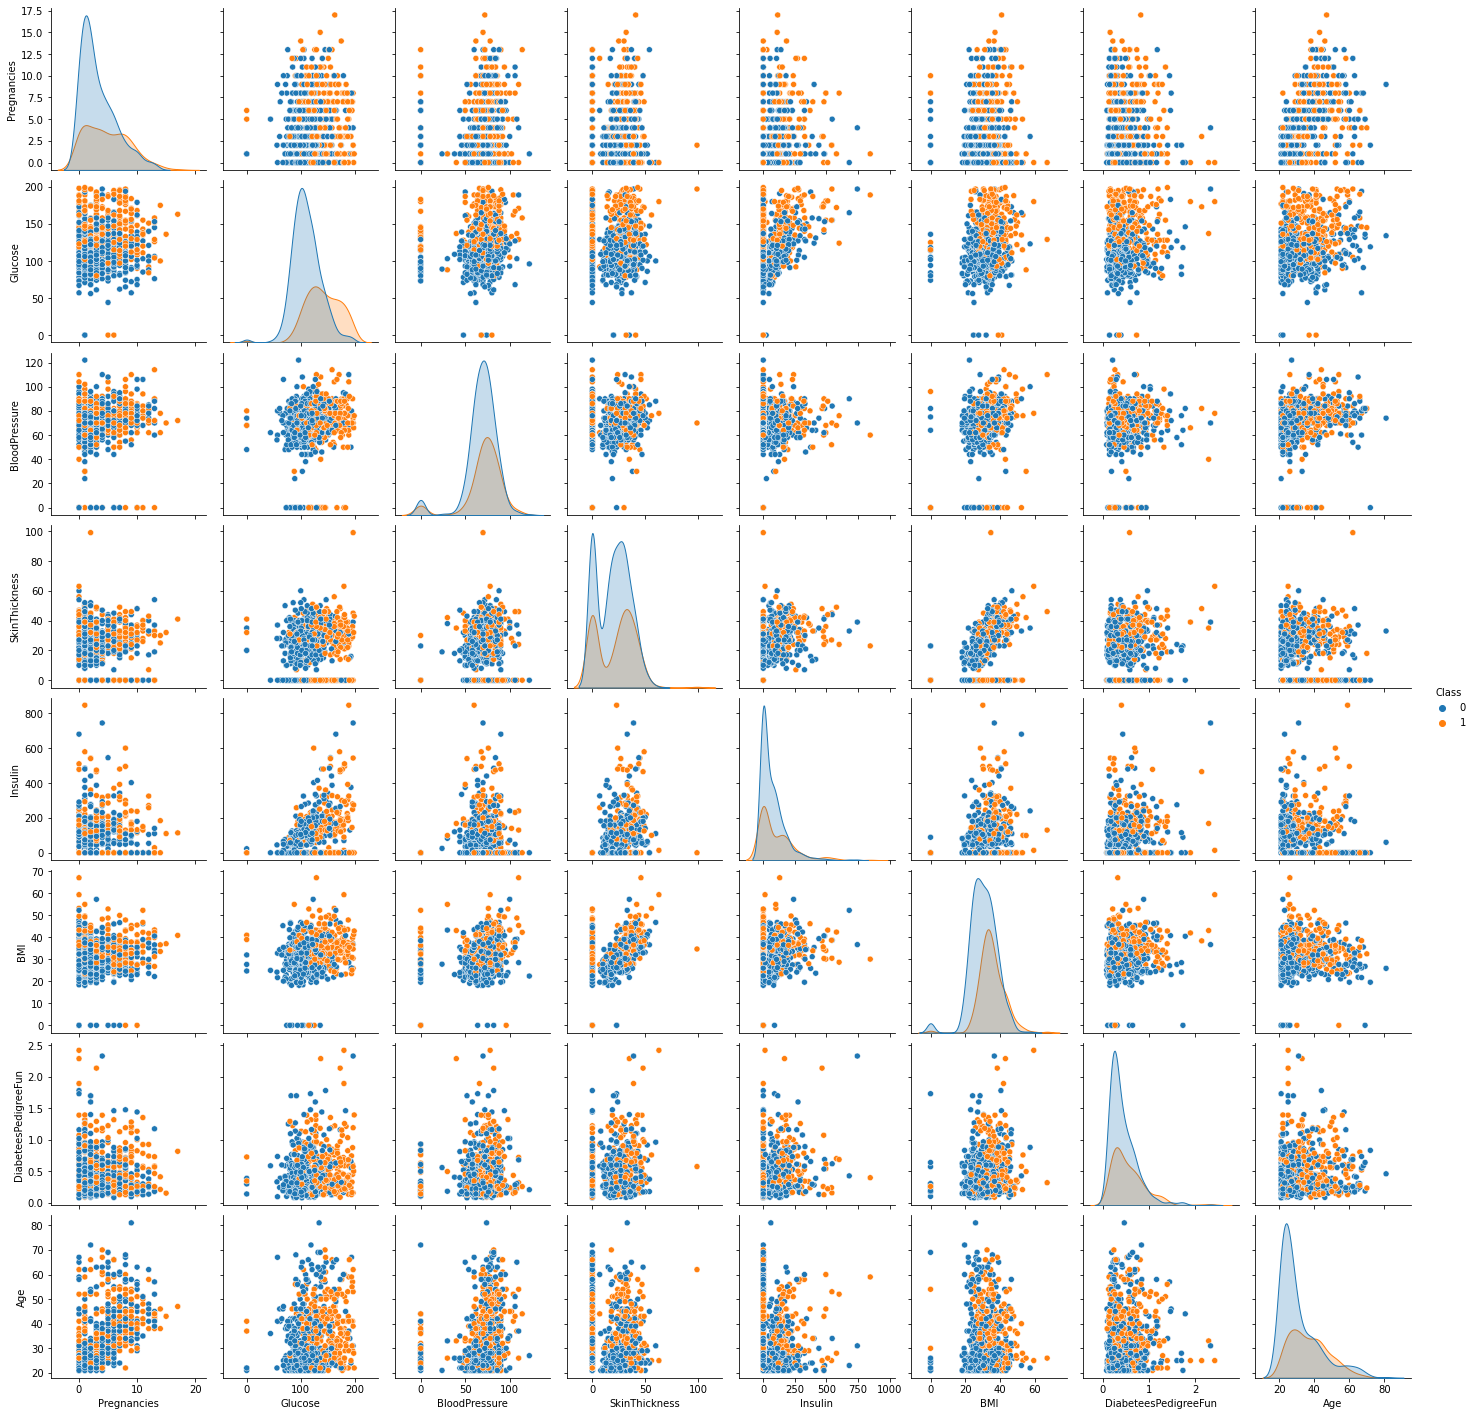

In [52]:
sns.pairplot(df, hue="Class")

#### From the above pair plots, it is evedent that the data points are overlapping and hence logistic regression will not give an accurate result. Choosing Random Forest classifier for the model

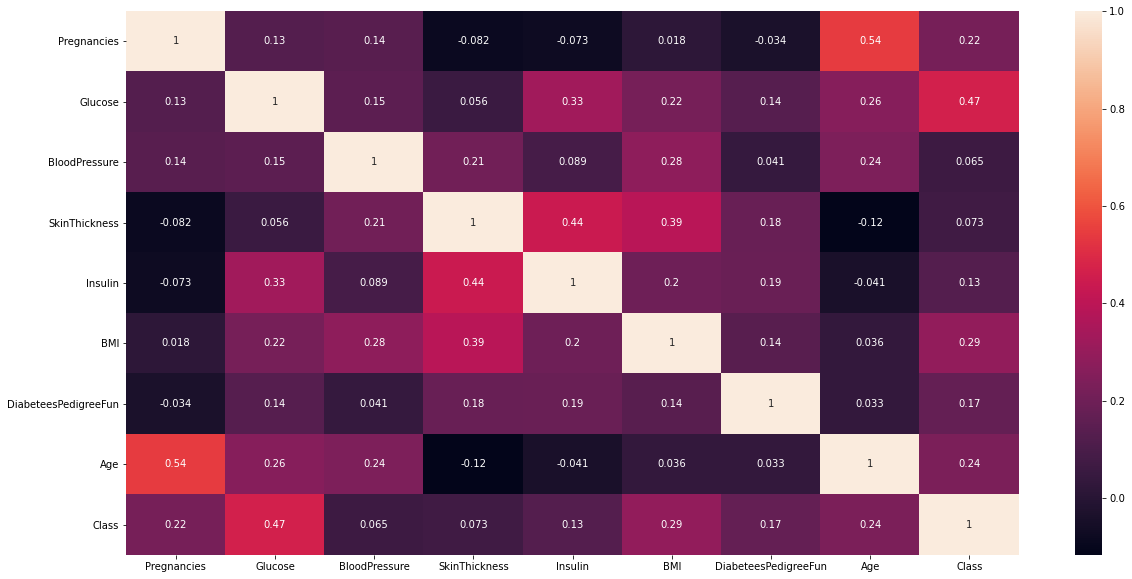

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### From the heat maps we can say that Glucose has the heighest co-relation value w.r.t Class

In [53]:
# Making train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class',axis=1),df.Class,test_size=0.15,random_state=0)

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

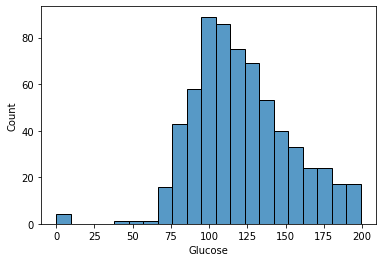

In [54]:
sns.histplot(X_train.Glucose)

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

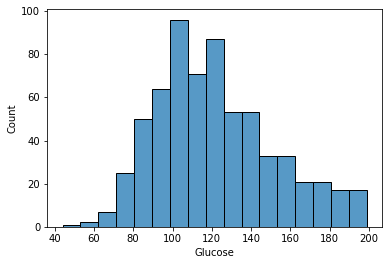

In [55]:
X_train.Glucose = np.where(X_train.Glucose == 0,X_train.Glucose.mean(),X_train.Glucose)
sns.histplot(X_train.Glucose)

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

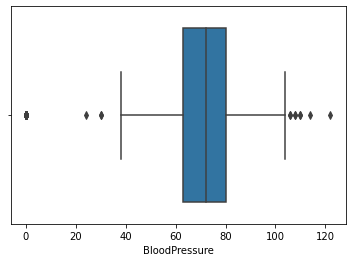

In [56]:
sns.boxplot(X_train.BloodPressure)

#### From the figure a few of the data points have the value of 0 and hence replacing them with the median 

C:\Users\Shreeraksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

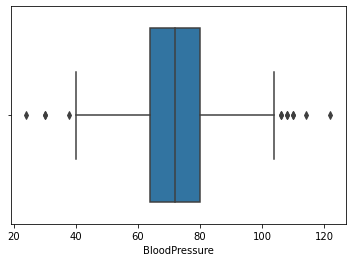

In [57]:
X_train.BloodPressure = np.where(X_train.BloodPressure == 0,X_train.BloodPressure.median(),X_train.BloodPressure)
sns.boxplot(X_train.BloodPressure)

## As the RandomForest classifier is not sesitive to outliers we can skip the outlier treatment

In [43]:
X_train.SkinThickness = np.where(X_train.SkinThickness == 0, X_train.SkinThickness.median(), X_train.SkinThickness)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

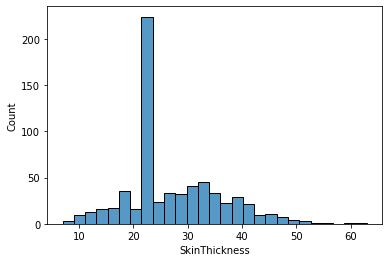

In [44]:
sns.histplot(X_train.SkinThickness)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

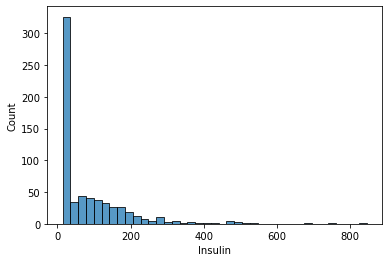

In [45]:
X_train.Insulin = np.where(X_train.Insulin == 0, X_train.Insulin.median(), X_train.Insulin)
sns.histplot(X_train.Insulin)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

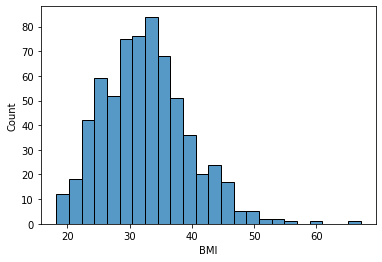

In [60]:
X_train.BMI = np.where(X_train.BMI == 0, X_train.BMI.median(), X_train.BMI)
sns.histplot(X_train.BMI)

<AxesSubplot:xlabel='DiabeteesPedigreeFun', ylabel='Count'>

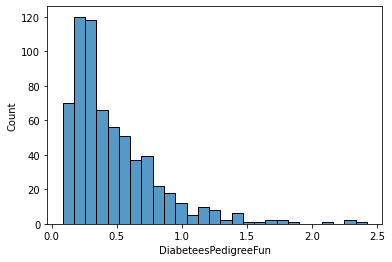

In [61]:
sns.histplot(X_train.DiabeteesPedigreeFun)

<AxesSubplot:xlabel='Age', ylabel='Count'>

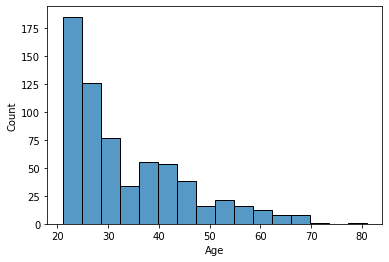

In [64]:
sns.histplot(X_train.Age)

### Checking if the train and test for dependent variable if they are proportionately divided

In [67]:
y_train.value_counts()

0    422
1    229
Name: Class, dtype: int64

In [68]:
y_test.value_counts()

0    78
1    38
Name: Class, dtype: int64

In [97]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age
661,8,167,106,46,231,37.6,0.165,43
122,5,132,80,0,0,26.8,0.186,69
113,7,160,54,32,175,30.5,0.588,39
14,7,100,0,0,0,30.0,0.484,32
529,2,122,60,18,106,29.8,0.717,22


## Checking for 0 values in all the features of X_test

In [99]:
X_test[X_test.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age
181,1,0,74,20,23,27.7,0.299,21


In [101]:
X_test.Glucose = np.where(X_test.Glucose == 0, X_test.Glucose.median(),X_test.Glucose)
X_test[X_test.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age


In [102]:
X_test.BloodPressure = np.where(X_test.BloodPressure == 0, X_test.BloodPressure.median(),X_test.BloodPressure)
X_test[X_test.BloodPressure == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age


In [103]:
X_test.SkinThickness = np.where(X_test.SkinThickness == 0, X_test.SkinThickness.median(),X_test.SkinThickness)
X_test[X_test.SkinThickness == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age


In [104]:
X_test.Insulin = np.where(X_test.Insulin == 0, X_test.Insulin.median(),X_test.Insulin)
X_test[X_test.Insulin == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age


In [105]:
X_test[X_test.BMI == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age
8,8,125.0,96.0,21.0,29.5,0.0,0.232,54
683,5,136.0,82.0,21.0,29.5,0.0,0.640,69


In [106]:
X_test.BMI = np.where(X_test.BMI == 0, X_test.BMI.median(),X_test.BMI)
X_test[X_test.BMI == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteesPedigreeFun,Age


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [70]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(rf,random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [71]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'gini'}

In [72]:
best_random_grid=rf_randomcv.best_estimator_

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_test_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_test_pred)))
print("Classification report: {}".format(classification_report(y_test,y_test_pred)))

[[70  8]
 [17 21]]
Accuracy Score 0.7844827586206896
Classification report:               precision    recall  f1-score   support

           0       0.80      0.90      0.85        78
           1       0.72      0.55      0.63        38

    accuracy                           0.78       116
   macro avg       0.76      0.73      0.74       116
weighted avg       0.78      0.78      0.78       116



### Grid search CV

In [74]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'gini'}

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth'],
                  rf_randomcv.best_params_['max_depth']+50,
                  rf_randomcv.best_params_['max_depth']-50],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf'] + 2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          ],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [120, 170, 70], 'max_features': ['sqrt'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [4, 5, 6], 'n_estimators': [1300, 1400, 1500, 1600]}


In [77]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(rf,param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [120, 170, 70],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [1300, 1400, 1500, 1600]},
             verbose=2)

In [78]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 1600}

In [85]:
rf_mod = RandomForestClassifier(n_estimators=1600, criterion='gini', max_depth=70, max_features='sqrt', min_samples_leaf=6,
                            min_samples_split=4)
rf_mod.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=4, n_estimators=1600)

In [107]:
y_test_pred = rf_mod.predict(X_test)
print(confusion_matrix(y_test,y_test_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_test_pred)))
print("Classification report: {}".format(classification_report(y_test,y_test_pred)))

[[71  7]
 [16 22]]
Accuracy Score 0.8017241379310345
Classification report:               precision    recall  f1-score   support

           0       0.82      0.91      0.86        78
           1       0.76      0.58      0.66        38

    accuracy                           0.80       116
   macro avg       0.79      0.74      0.76       116
weighted avg       0.80      0.80      0.79       116



---

### Save the model to reuse it

In [87]:
import pickle
# open a file, where you ant to store the data
file = open('dia_pred.pkl', 'wb')

# dump information to that file
pickle.dump(rf_mod, file)

In [89]:
model = open('dia_pred.pkl','rb')
forest = pickle.load(model)

In [90]:
y_prediction = forest.predict(X_test)

In [94]:
accuracy_score(y_test, y_prediction)

0.8017241379310345

---